Testing whether the Hogg method does the same thing as the analytic method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import corner
import emcee

Define functions for MCMC

In [6]:
def lnprior(pars):
    if -10 < pars[0] < 10 and -10 < pars[1] < 10 and -10 < pars[2] < 10:
        return 0.
    else:
        return -np.inf

In [11]:
def hogg_lnprob(pars, x, y, yerr):
    return lnprior(pars) + lnlikeHF(pars, x, y, yerr)

In [8]:
def lnprob(pars, x, y, yerr):
    return lnprior(pars) + lnlike(pars, x, y, yerr)

In [9]:
def lnlikeHF(pars, samples, obs, u):
     ndims, nobs, nsamp = samples.shape
        ll = np.zeros((nobs, nsamp*nobs))
        for i in range(nobs):
            inv_sigma2 = 1.0/(u[1, :][i]**2 + (pars[2]*model1(pars, obs[0, :][i]))**2)
            ll[i, :] = -.5*((obs[1, :][i] - model(pars, samples))**2*inv_sigma2) + np.log(inv_sigma2)
        loglike = np.sum(np.logaddexp.reduce(ll, axis=1))
        if np.isfinite(loglike):
            return loglike
        return -np.inf

In [10]:
def lnlike(pars, x, y, yerr):
    invsig2 = 1./(yerr**2 + np.exp(2*pars[2]))
    model_y = pars[0] * x + pars[1]
    return -.5*np.sum((y-model_y)**2*invsig2 - np.log(invsig2))

Define a function for generating samples from the data

Load and plot data

params =  -0.525509606298 2.88909102256


/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


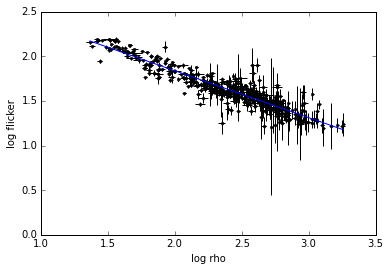

In [5]:
# load data
f, ferr, r, rerr = np.genfromtxt("../data/flickers.dat").T

# fit a line
AT = np.vstack((r, np.ones_like(r)))
ATA = np.dot(AT, AT.T)
m, c = np.linalg.solve(ATA, np.dot(AT, f))
print("params = ", m, c)

# plot data with best fit line
xs = np.linspace(min(r), max(r), 100)
ys = m * xs + c
plt.errorbar(r, f, xerr=rerr, yerr=ferr, fmt="k.", capsize=0)
plt.plot(xs, ys)
plt.ylabel("log flicker")
plt.xlabel("log rho")